<a href="https://colab.research.google.com/github/jonatanpereira/Alura-Imersao-dados03/blob/main/Notebooks/Aula05_Imers%C3%A3oDados3_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

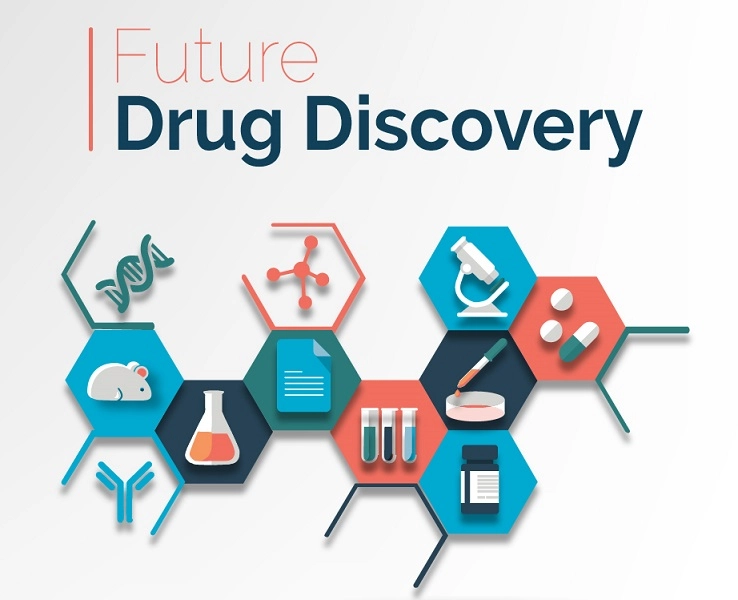

> Bloco com recuo





# **Eai, beleza?!**
# **Bora pra Quinta aula?!**



Continuação do projeto aqui no google colaboratory de Data Science da Imersão de Dados da Alura.

# **Objetivo desta análise**

Essa análise tem como objetivo descrever os dados presente nesse dataset. Inciando com análises que possam entender os tipos de dados presente, se há necessidade de tratamento para análises mais profundas futuramente, assim como, realizar uma breve descrição estatística .

Esse projeto faz parta da Semana de Imersão em Data Science realizada pela [Alura Imersão de Dados](https://www.alura.com.br/imersao-dados).

Esse projeto foi inspirado em um desafio do [Laboratory innovation science at Harvard](https://lish.harvard.edu/) disponibilizando os dados em uma competição no [Kaggle](https://www.kaggle.com/)

# **Resumo da aula**



# **Importando os dados**

Nessa imersão nós vamos mergulhar no universo da biologia e da biotecnologia e explorar uma base de dados da área.

Para a nossa análise, está faltando então os dados. Para conseguirmos esses dados vamos acessar o Github, nesse link:

https://github.com/alura-cursos/imersaodados3/tree/main/dados

Então, agora vamos importar essa base de dados para dentro do nosso notebook. Para juntar essas informações vamos utilizar nossa famosa biblioteca do "Pandas". Vamos importar essa biblioteca através do seguinte código:

In [ ]:
#Pegar a base de dados que irá ser estudada. Isso pode ser feito por meio da função pd.read_csv()

import pandas as pd
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')

In [ ]:
#Abaixo vamos realizar a alteração do nome da coluna "Drogra" para "Composto", por ser mais próximo da realidade do conteúdo da coluna.

mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [ ]:
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
cod_compostos = dados['composto'].value_counts().index[0:5]

In [ ]:
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [ ]:
dados.query('composto in @cod_compostos')

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775

In [ ]:
#Criando um gráfico de dispersão
#Correlacionando a coluna dos Genes g-0 e g-3

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
import numpy as np

In [ ]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')


In [ ]:
dados_resultados['acat_inhibitor'].unique()

array([0, 1])

In [ ]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [ ]:
contagem_moa01 = dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False)

In [ ]:
contagem_moa02 = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)

In [ ]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [ ]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

In [ ]:
dados_resultados['ativo_moa'] = dados_resultados['n_moa'] !=0

In [ ]:
dados_combinados = pd.merge(dados, dados_resultados[['id', 'n_moa', 'ativo_moa']], on='id')

In [ ]:
dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [ ]:
dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

In [ ]:
composto_principal = dados_combinados['composto'].value_counts().index[:5]

# **INICIO DA AULA 05**

In [ ]:
##Importação de Train teste split do SKLEARN

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

In [ ]:
#Importação de Modelo de Regressão Logistica do SKLEARN
from sklearn.linear_model import LogisticRegression

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.6267058576527399

In [ ]:
#Importação de Dummy Classifier e Accuracy Score do SKLEARN

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dumy = DummyClassifier('most_frequent')
modelo_dumy.fit(x_treino, y_treino)
previsao_dummy = modelo_dumy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6067604450976275

In [ ]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

In [ ]:
#Importação do Decision Tree Classifier do SKLEARN

from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6105395758975436

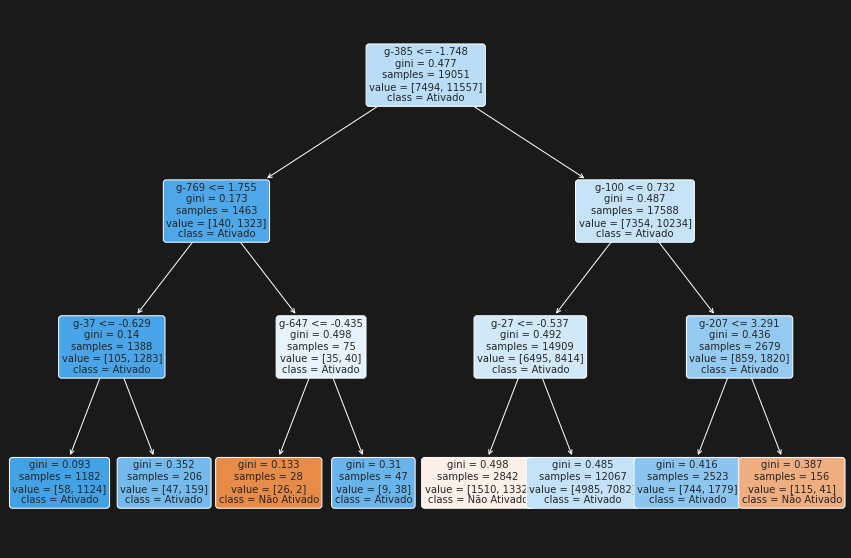

In [ ]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15,10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax = ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()